<a href="https://colab.research.google.com/github/Nazmus-Sanib/Modeling_program_with_python/blob/main/success_code_saint_venant_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


2

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:

fn = "drive/MyDrive/seismic_noise/bathymetry_land_low_resolution_zeros.nc"
df = xr.open_mfdataset(fn)

df

<xarray.Dataset>
Dimensions:     (northing: 287, easting: 162)
Coordinates:
  * northing    (northing) float32 2.458e+06 2.458e+06 ... 2.477e+06 2.477e+06
  * easting     (easting) float32 3.768e+05 3.769e+05 ... 3.858e+05 3.858e+05
Data variables:
    bathymetry  (northing, easting) float32 dask.array<chunksize=(287, 162), meta=np.ndarray>

In [ ]:

zero_bathymetry_index_ = []
for j in range(len(df.northing.values)):
  n = list(df.bathymetry.values[j,:])
  s = 100
  for i in range(len(df.bathymetry.values[j, :])):

    if df.bathymetry.values[j][i] == 0:
      n[i] = s
      s+=1

  zero_bathymetry_index_.append([j, np.array([n.index(i) for i in n if i in range(100, max(n)+1)])])


zero_bathymetry_index = np.array([i[1] for i in zero_bathymetry_index_])

np.array(zero_bathymetry_index)

<ipython-input-4-990db6292898>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  zero_bathymetry_index = np.array([i[1] for i in zero_bathymetry_index_])


array([array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
               13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
               26,  28,  29,  32,  33,  50,  51,  55,  56,  57,  58,  60,  61,
               62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,  75,
               76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
               89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
              102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
              115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
              128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
              141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
              154, 155, 156, 157, 158, 159, 160, 161])                        ,
       array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
               13,  14,  15,  16,  17,  18,  19,  2

In [ ]:
unit_i = np.zeros(162)
non_zero_bathymetry_index_ = np.array([np.array([j for j in range(len(unit_i)) if j not in i]) for i in zero_bathymetry_index])

non_zero_bathymetry_index = np.array([np.arange(np.nanmin(i), np.nanmax(i)+1,1) for i in non_zero_bathymetry_index_])

non_zero_bathymetry_index

<ipython-input-5-961268b4e2db>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  non_zero_bathymetry_index_ = np.array([np.array([j for j in range(len(unit_i)) if j not in i]) for i in zero_bathymetry_index])
<ipython-input-5-961268b4e2db>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  non_zero_bathymetry_index = np.array([np.arange(np.nanmin(i), np.nanmax(i)+1,1) for i in non_zero_bathymetry_index_])


array([array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
              44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
              61, 62, 63, 64, 65, 66])                                           ,
       array([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
              46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
              63, 64, 65, 66])                                                   ,
       array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
              48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
              65, 66])                                                           ,
       array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
              47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
              64, 65, 66])                                                       ,
       array

In [ ]:
# non_zero_bathymetry

bathy = np.array([df.bathymetry.values[i,non_zero_bathymetry_index[i][0]:non_zero_bathymetry_index[i][-1]+1] for i in range(len(df.northing.values))])

northcrs = df.northing.values

eastcrs = np.array([df.easting.values[non_zero_bathymetry_index[i][0]:non_zero_bathymetry_index[i][-1]+1] for i in range(len(df.northing.values))])

np.array([len(i) for i in eastcrs]) #== np.array([len(i) for i in bathy])

<ipython-input-6-1719fa749859>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bathy = np.array([df.bathymetry.values[i,non_zero_bathymetry_index[i][0]:non_zero_bathymetry_index[i][-1]+1] for i in range(len(df.northing.values))])
<ipython-input-6-1719fa749859>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eastcrs = np.array([df.easting.values[non_zero_bathymetry_index[i][0]:non_zero_bathymetry_index[i][-1]+1] for i in range(len(df.northing.values))])


array([40, 38, 36, 37, 40, 37, 41, 42, 40, 42, 42, 40, 40, 42, 40, 40, 35,
       33, 34, 36, 31, 32, 39, 39, 33, 32, 30, 28, 30, 31, 26, 26, 27, 28,
       29, 29, 29, 30, 30, 30, 31, 31, 32, 32, 32, 25, 26, 26, 27, 28, 29,
       29, 29, 30, 63, 63, 47, 56, 56, 54, 32, 42, 63, 63, 63, 63, 62, 80,
       81, 81, 81, 81, 81, 80, 80, 63, 65, 67, 67, 57, 56, 63, 62, 61, 60,
       67, 21, 21, 21, 21, 21, 21, 21, 21, 19, 19, 13, 16, 17, 18, 19, 19,
       19, 19, 19, 19, 18, 18, 18, 18, 24, 20, 18, 22, 27, 27, 27, 25, 33,
       32, 35, 35, 35, 35, 33, 35, 41, 41, 41, 41, 41, 41, 41, 41, 54, 53,
       46, 38, 44, 45, 41, 57, 46, 47, 55, 71, 71, 71, 66, 67, 91, 91, 92,
       93, 94, 89, 88, 87, 85, 84, 84, 89, 88, 88, 87, 87, 66, 65, 65, 64,
       57, 58, 64, 64, 66, 66, 66, 56, 57, 59, 63, 66, 37, 37, 41, 52, 51,
       50, 46, 47, 49, 49, 49, 49, 49, 45, 45, 45, 45, 42, 42, 44, 44, 45,
       45, 45, 45, 45, 45, 43, 43, 42, 44, 45, 46, 46, 47, 47, 42, 42, 43,
       43, 44, 44, 45, 45

In [ ]:
# Correction of bathymetry by adding elevation
elev_ = np.hstack([np.zeros(95), np.linspace(0,1, 287-95)])
bathy_ = np.array([bathy[i]+elev_[i] for i in range(len(bathy))])
# End of correction

bathy_12 = []
for i in range(11,13):
  bathy_12.append(np.hstack([np.linspace(bathy_[i][j], bathy_[j][i+1],55) for j in range(len(bathy_[i])-1)]))


bathy_d = []
for i in range(len(bathy_12)-1):
  bathy_d.append(np.array([np.linspace(bathy_12[i][j],bathy_12[i+1][j], 65) for j in range(len(bathy_12[i]))]))

bathy_d = np.array(bathy_d[0])   # Easting, northing

bathy_d.shape

<ipython-input-7-9829351d443e>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bathy_ = np.array([bathy[i]+elev_[i] for i in range(len(bathy))])


(2145, 65)

In [ ]:
num1 = int(2585/5)

seq1 = [num1/len(i) for i in bathy]
seq2 = [int(seq1[i])*len(bathy[i]) for i in range(len(seq1))]
seq3 = [num1-seq2[i] for i in range(len(seq2))]

seq4 = [[int(seq1[i]),seq3[i]] for i in range(len(seq3))]

len(seq4)

287

In [ ]:
bathy_n = []
eastcrs_n = []
num2   = int(65/5)
for i in range(len(bathy_)):

  bathy_n2 = []
  eastcrs_n2 = []
  for j in range(len(bathy_[i])-1):
    if j == 1:
       seq_ = seq4[i][0]+seq4[i][1]
    elif j == 0:  #len(bathy_[i]-1)
      seq_ = 2*seq4[i][0]
    else:
      seq_ = seq4[i][0]

    seq5 = np.linspace(bathy_[i][j], bathy_[i][j+1],seq_)
    bathy_n2.append(seq5)

    eastSeq = np.linspace(eastcrs[i][j], eastcrs[i][j+1],seq_)
    eastcrs_n2.append(eastSeq)


  bathy_n.append(np.hstack(bathy_n2))
  eastcrs_n.append(np.hstack(eastcrs_n2))




eastcrs_d = []
bathy_d = []
s = 0
for i in range(len(bathy_n)-1):

  secondary_object = np.array([np.linspace(bathy_n[i][j],bathy_n[i+1][j], num2) for j in range(len(bathy_n[i]))])

  bathy_d.append(np.array([np.hstack(secondary_object[:,k]) for k in range(num2)]))


  secondary_east = np.array([np.linspace(eastcrs_n[i][j],eastcrs_n[i+1][j], num2) for j in range(len(eastcrs_n[i]))])

  eastcrs_d.append(np.array([np.hstack(secondary_east[:,k]) for k in range(num2)]))




bathy_f = np.vstack(np.array(bathy_d,dtype = np.float128))   # northing, easting

eastcrs_f = np.vstack(np.array(eastcrs_d,dtype = np.float128))

bathy_f.shape, eastcrs_f.shape


((3718, 517), (3718, 517))

In [ ]:
# Calculation of angle, u and v

northcrs_f = np.linspace(northcrs[0], northcrs[-1], 286*num2,dtype = np.float128)
# eastcrs_f, northcrs_f

# angle = average(inverse_tan((y1-y2)/(x1-x2)) [left, right])

def uv(northcrs_f, eastcrs_f, velocity):

  angle = np.array([np.arctan((northcrs_f[i+1]-northcrs_f[i])/(eastcrs_f[i+1][:] - eastcrs_f[i][:])) for i in range(len(northcrs_f)-1)],dtype = np.float128)

  angle[np.isnan(angle)] = np.pi/2

  u_non = np.array([velocity[i]*np.cos(angle[i]) for i in range(len(angle))],dtype = np.float128)

  u_last = u_non[-1,:]

  zeros = np.zeros((u_non.shape[0]+1, u_non.shape[1]),dtype = np.float128)

  zeros[:-1, :] = u_non

  zeros[-1,:] = u_last

  u = zeros.copy()



  v_non = np.array([velocity[i]*np.sin(angle[i]) for i in range(len(angle))],dtype = np.float128)

  v_last = v_non[-1,:]
  zeros = np.zeros((v_non.shape[0]+1, v_non.shape[1]),dtype = np.float128)

  zeros[:-1, :] = v_non

  zeros[-1,:] = v_last

  v = zeros.copy()


  return u,v

# Need to decrement of the shape of the northcrs_f, eastcrs_f, bathymetry by 1 in the time of run the simulation,
# the last one will be removed the 18590th
#u,v = uv(northcrs_f, eastcrs_f, np.ones(len(northcrs_f)))

#u.shape, v.shape, bathy_f.shape

In [ ]:

maxTime = 1000

Q = np.zeros(1000)   # Q = 4 m^3 per second

Q[:10] = np.zeros(10)+4

V = 0.5

QV = Q*V

dx = 2
beta = 1


h = np.linspace(12, 10, 1000)

m =1.5 # side slope


b = np.hstack((np.linspace(5, 10, 500), np.linspace(10, 5, 500)))

area = (m*h+b)*h

u = np.hstack((np.linspace(0.3, 0.6, 500), np.linspace(0.6,0.3, 500)))

alpha = sum((1/area)*(u/V)**3)


theta = 0


g = 9.81

Si12 = np.ones(1000)


In [ ]:
def steady_state_st_venant():

  hn = h.copy()


  Ai12 = (0.25*(hn[2:]+hn[1:-1])**2)*(1/np.tan(alpha))+0.5*(hn[2:]+hn[1:-1])*b[1:-1]
  Ai_12 = (0.25*(hn[:-2]+hn[1:-1])**2)*(1/np.tan(alpha))+0.5*(hn[:-2]+hn[1:-1])*b[1:-1]

  QV[2:] = QV[1:-1] - (dx/beta)*(-g*Ai12*np.cos(theta)*((hn[2:]-hn[1:-1])/dx)+g*Ai12*Si12[1:-1])

  Qn = QV/V

  h[2:] = h[1:-1]+(1/np.cos(theta))*((beta*Qn[1:-1]**2)/(g*(Ai12*Ai_12)) - (beta*Qn[1:-1]**2)/(g*Ai12**2)+dx*Si12[1:-1])

  return h, Qn



In [ ]:
# Run the simulation

# if dx = 2, then number of dx would be 1000. The number of dx is exponential to the value of dx

"""sim_res = steady_state_st_venant()

plt.plot(sim_res[0])
plt.show()
plt.plot(sim_res[1])"""

'sim_res = steady_state_st_venant()\n\nplt.plot(sim_res[0])\nplt.show()\nplt.plot(sim_res[1])'

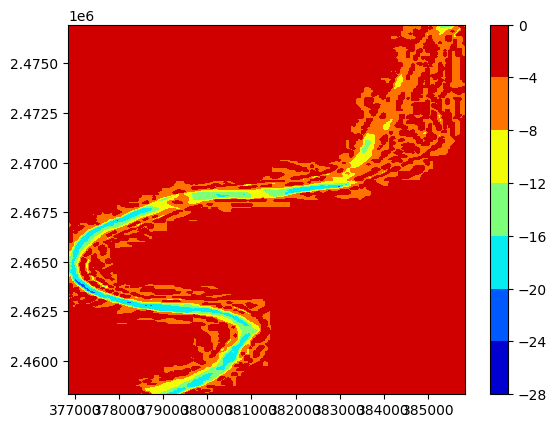

In [ ]:
m = plt.contourf(df.easting.values, df.northing.values, df.bathymetry.values, cmap = 'jet')
plt.colorbar(m)

In [ ]:
# calculation of dx
dx = ((2.4750e6-2.46e6)/30)/1000

378000 - 377000

1000

In [ ]:
num, val, initial_b_ = [int((21.43/100)*30),int((14.29/100)*30),int((14.29/100)*30),int((50/100)*30)],[-6, -10, -12, -18], [1150,1000,200,200]

initial_h = np.hstack([np.zeros(num[i])+val[i] for i in range(len(num))])

initial_b = np.hstack([np.zeros(num[i])+initial_b_[i] for i in range(len(num))])
initial_h, initial_b

(array([ -6.,  -6.,  -6.,  -6.,  -6.,  -6., -10., -10., -10., -10., -12.,
        -12., -12., -12., -18., -18., -18., -18., -18., -18., -18., -18.,
        -18., -18., -18., -18., -18., -18., -18.]),
 array([1150., 1150., 1150., 1150., 1150., 1150., 1000., 1000., 1000.,
        1000.,  200.,  200.,  200.,  200.,  200.,  200.,  200.,  200.,
         200.,  200.,  200.,  200.,  200.,  200.,  200.,  200.,  200.,
         200.,  200.]))

In [ ]:

"""Q = np.zeros(1000)

Q[:10] = np.zeros(10)+4

V = 0.5

QV = Q*V

dx = 0.5
beta = 1


#h = np.linspace(30, 29, 1000)

h = np.linspace(initial_h[0], initial_h[1], 1000)

m =1.5 # side slope


#b = np.hstack((np.linspace(500, 1000, 500), np.linspace(1000, 500, 500)))
b = np.zeros(1000)+initial_b[0]

area = (m*h+b)*h

u = np.linspace(0.3, 0.6, 1000)

alpha = sum((1/area)*(u/V)**3)


theta = 0.0573


g = 9.81

Si12 = np.ones(1000)



#space = np.linspace(30,5,20)

space = initial_h.copy()




sim_res = steady_state_st_venant()

simulation_result = []
s = 0
for i in range(1,len(space)-1):
  s+=1
  print("Space Step {}".format(s))

  #h = np.linspace(29-i, 28-i, 1000)
  h = np.linspace(space[i],space[i+1], 1000)

  h[:10] = sim_res[0][-10:]

  b = np.zeros(1000)+initial_b[i]

  area = (m*h+b)*h

  Q = np.zeros(1000)

  Q[:10] = sim_res[1][-10:]

  sim_res = steady_state_st_venant()

  simulation_result.append(sim_res)"""





'Q = np.zeros(1000)\n\nQ[:10] = np.zeros(10)+4\n\nV = 0.5\n\nQV = Q*V\n\ndx = 0.5\nbeta = 1\n\n\n#h = np.linspace(30, 29, 1000)\n\nh = np.linspace(initial_h[0], initial_h[1], 1000)\n\nm =1.5 # side slope\n\n\n#b = np.hstack((np.linspace(500, 1000, 500), np.linspace(1000, 500, 500)))\nb = np.zeros(1000)+initial_b[0]\n\narea = (m*h+b)*h\n\nu = np.linspace(0.3, 0.6, 1000)\n\nalpha = sum((1/area)*(u/V)**3)\n\n\ntheta = 0.0573\n\n\ng = 9.81\n\nSi12 = np.ones(1000)\n\n\n\n#space = np.linspace(30,5,20)\n\nspace = initial_h.copy()\n\n\n\n\nsim_res = steady_state_st_venant()\n\nsimulation_result = []\ns = 0\nfor i in range(1,len(space)-1):\n  s+=1\n  print("Space Step {}".format(s))\n\n  #h = np.linspace(29-i, 28-i, 1000)\n  h = np.linspace(space[i],space[i+1], 1000)\n\n  h[:10] = sim_res[0][-10:]\n\n  b = np.zeros(1000)+initial_b[i]\n\n  area = (m*h+b)*h\n\n  Q = np.zeros(1000)\n\n  Q[:10] = sim_res[1][-10:]\n\n  sim_res = steady_state_st_venant()\n\n  simulation_result.append(sim_res)'

In [ ]:
"""plt.plot(np.hstack([np.array(i[0]) for i in simulation_result]))
plt.title("Water Level")
plt.show()

plt.plot(np.hstack([np.array(i[1]) for i in simulation_result]))
plt.title("River Discharge")

simulation_result[-1]


# Recommendation: remove the outlier by calculating the euclidean distance between
# the value and the standard deviation for space step of simulation result.
#Then replace the outlier with the mean value."""



'plt.plot(np.hstack([np.array(i[0]) for i in simulation_result]))\nplt.title("Water Level")\nplt.show()\n\nplt.plot(np.hstack([np.array(i[1]) for i in simulation_result]))\nplt.title("River Discharge")\n\nsimulation_result[-1]\n\n\n# Recommendation: remove the outlier by calculating the euclidean distance between\n# the value and the standard deviation for space step of simulation result.\n#Then replace the outlier with the mean value.'

#Instruction: Set the boundary condition, backpropagation the intial conditionj and boundary condition.


#My Proposal: Append all segment of 5 adjacent bathymetry just alike the 1 d model.

#And apply ML backpropagation to the adjustment of the Inlet and Outlet boundary condition.

In [ ]:
H_ = bathy_f.copy()

area = np.array([sum([abs(eastcrs_f[i][j+1]-eastcrs_f[i][j])*(abs(H_[i][j])+abs(H_[i][j+1]))/2 for j in range(len(eastcrs_f[i])-1)])  for i in range(len(northcrs_f))],dtype = np.float128)


a1,v1 = 7744.15/2.38,2.38

initial_velocity = (a1*v1)/area

angle_ = np.array([np.arctan((northcrs_f[i+1]-northcrs_f[i])/(eastcrs_f[i+1][0] - eastcrs_f[i][-1])) for i in range(len(northcrs_f)-1)],dtype = np.float128)

zeros = np.zeros(len(northcrs_f))

angle_last = angle_[-1]

zeros[:-1] = angle_

zeros[-1] = angle_last

angle = np.pi/2 - zeros

initial_velocity_c = np.array([((initial_velocity[i]*np.cos(angle[i]))**2+(initial_velocity[i]*np.sin(angle[i]))**2)**0.5 for i in range(len(initial_velocity))])

initial_velocity_c

array([0.58194407, 0.58273604, 0.58352973, ..., 0.81873405, 0.81454965,
       0.8104078 ], dtype=float128)

In [ ]:
dy = np.round(abs(northcrs_f[1] - northcrs_f[0]),2)

mannings_roughness_coefficient = 0.04

n = mannings_roughness_coefficient

middle_bathy = np.array([i[258] for i in bathy_f])

for i in range(len(middle_bathy)) :

  if middle_bathy[i]==0:

    middle_bathy[i] = np.nanmean(bathy_f[i])

wetted_peremeter = np.pi*middle_bathy

Hydraulic_radius = area/wetted_peremeter

Rh = Hydraulic_radius

C = (1/n)*(np.abs(Rh)**(1/6))

g = 9.81

dt =  0.05

maxtime = 10

channel_width = np.array([abs(i[0]-i[-1]) for i in eastcrs_f])

b  = channel_width.copy()

In [ ]:
def unteady_1d_sve(area,initial_velocity,middle_bathy,b,C,Rh,maxtime,dt,dy,g, data_per_time_steps = False):

  C = (1/n)*(np.abs(Rh)**(1/6))

  V = initial_velocity.copy()

  h = middle_bathy.copy()

  A = area.copy()

  density_sediment = [1200, 1280]  # Clay, Silt loam

  sediment_diameter = [.000003,.000006]

  res = []
  for time in range(maxtime):

    Vn = V.copy()

    hn = h.copy()


    h[1:-1] = hn[1:-1]-dt*(1/b[1:-1])*(Vn[1:-1]*((A[2:] - A[:-2])/dy) + A[1:-1]*((Vn[2:] - Vn[:-2])/dy))

    j = Vn[1:-1]/((C[1:-1]**2)*Rh[1:-1])

    V[1:-1] = Vn[1:-1] + dt*(g*(-j) - Vn[1:-1]*((Vn[2:] - Vn[:-2])/dy) - g*((hn[2:] - hn[:-2])/dy))


    if time == 0 or  (time+1) % 250 == 0:
      if data_per_time_steps:
        dsv = np.vstack([np.abs(V)-(g*(density_sediment[lll]/996-1)*sediment_diameter[lll]**2)/(0.8196e-6) for lll in range(len(density_sediment))])
        res.append(np.array([V,h-middle_bathy, A*V, dsv[0],dsv[1]]))

  if data_per_time_steps:
    return np.array(res)


  #   Viscosity source: https://www.omnicalculator.com/physics/water-viscosity

  # Water density calculator source: http://www.csgnetwork.com/h2odenscalc.html

  # Particle diamter source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FSediment-Particle-Sizes_tbl1_276906929&psig=AOvVaw1XSyj6gWUplK1NkhEc9sFP&ust=1690369026635000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCMDXhb3ZqYADFQAAAAAdAAAAABAE

  # Particle density: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2F1-Typical-Values-of-Dry-Density-of-Various-Soil-Types-and-Concrete_tbl3_241958123&psig=AOvVaw1CfFZ0Gdv-2fC64SFDvyEJ&ust=1690368888378000&source=images&cd=vfe&opi=89978449&ved=0CBMQjhxqFwoTCPCGgYvaqYADFQAAAAAdAAAAABAE

  dsv = np.vstack([np.abs(V)-(g*(density_sediment[lll]/1092.13-1)*sediment_diameter[lll]**2)/(0.825e-6) for lll in range(len(density_sediment))])







  return np.array([V,h-middle_bathy, A*V, dsv[0],dsv[1]])



In [ ]:
run = unteady_1d_sve(area[:1000],initial_velocity_c[:1000],middle_bathy[:1000],b[:1000],C[:1000],Rh[:1000],1000,0.0005,dy,g,True)



In [ ]:
percentage = np.arange(0.5,1.51,0.25)

sim_river_discharge = np.vstack([np.array([unteady_1d_sve(area[:1000],initial_velocity_c[:1000]*i,middle_bathy[:1000],b[:1000],C[:1000],Rh[:1000],1000,0.0005,dy,g)]) for i in percentage])



In [ ]:
p = "drive/MyDrive/seismic_noise/"

import os

if not os.path.exists(p+"one_d_unsteady_sve_output/"):
  os.mkdir(p+"one_d_unsteady_sve_output/")

out = p+"one_d_unsteady_sve_output/"

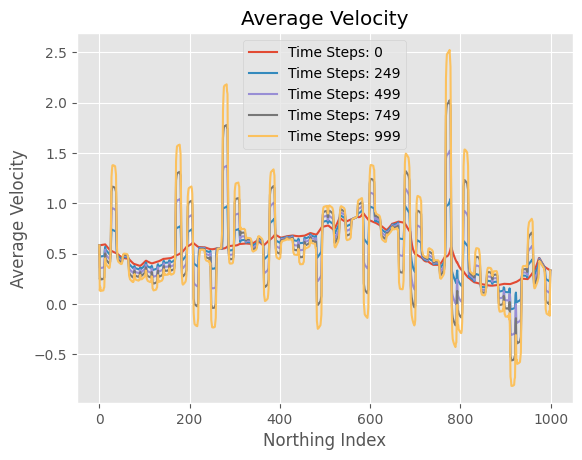

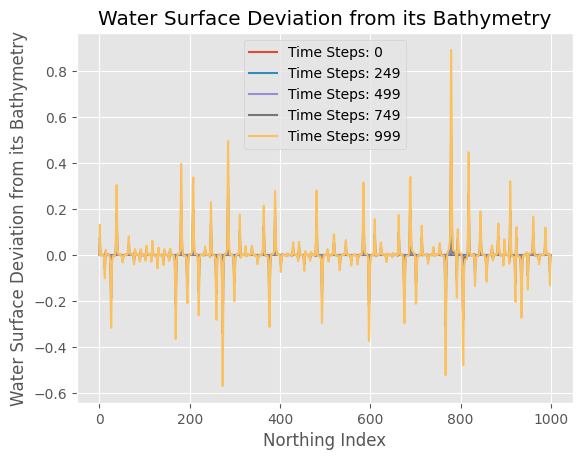

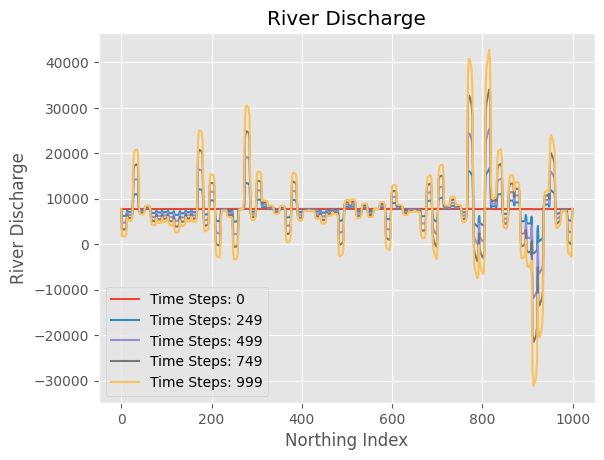

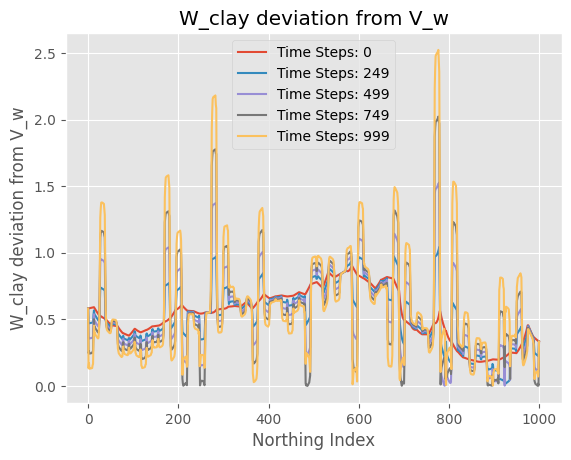

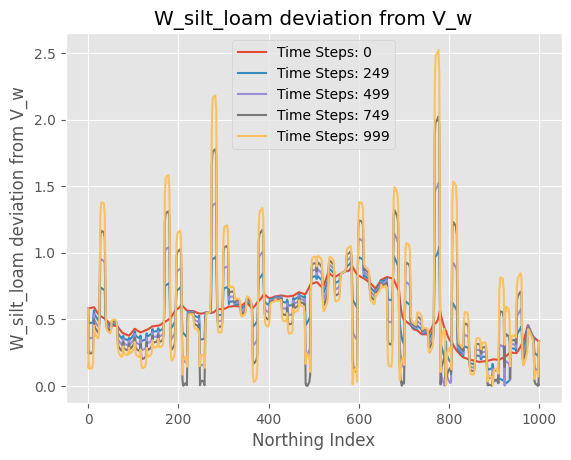

In [ ]:

ylabels = ["Average Velocity","Water Surface Deviation from its Bathymetry",
           "River Discharge", "W_clay deviation from V_w",
           "W_silt_loam deviation from V_w"]

xlabels = "Northing Index"

plt.style.use('ggplot')


time_steps = [0,249,499,749,999]
for i in range(5):
  for j in range(len(time_steps)):
    plt.plot(run[j,i,:], label = 'Time Steps: {}'.format(time_steps[j]))

    plt.legend()

  plt.xlabel(xlabels)

  plt.ylabel(ylabels[i])

  plt.title(ylabels[i])

  plt.savefig(out+"Normal_discharge_"+"_".join(ylabels[i].split(" "))+".png")

  plt.show()



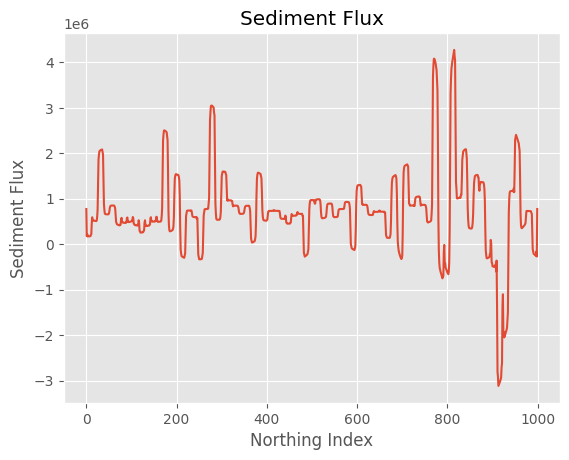

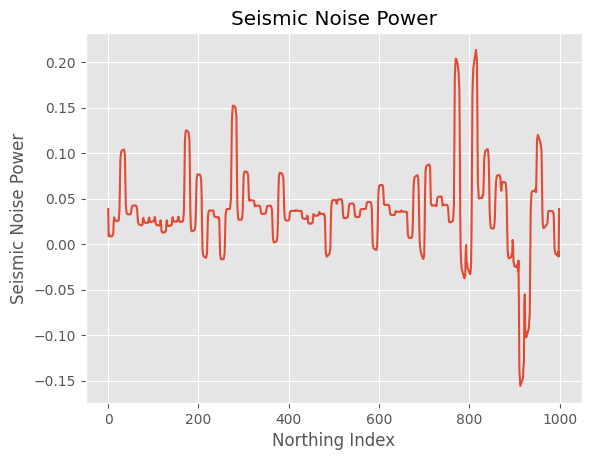

In [ ]:

ylabels = ["Sediment Flux", 'Seismic Noise Power']

xlabels = "Northing Index"

plt.style.use('ggplot')


def sed_flux(run):
  return run*100


def snp(run):
  return (run-7)/200000

vars = [sed_flux(run[-1,2,:]),snp(run[-1,2,:])]

for i in range(len(ylabels)):

    plt.plot(vars[i], label = '{}'.format(ylabels[i]))



    plt.xlabel(xlabels)

    plt.ylabel(ylabels[i])

    plt.title(ylabels[i])


    plt.savefig(out+"Normal_discharge_"+"_".join(ylabels[i].split(" "))+".png")

    plt.show()



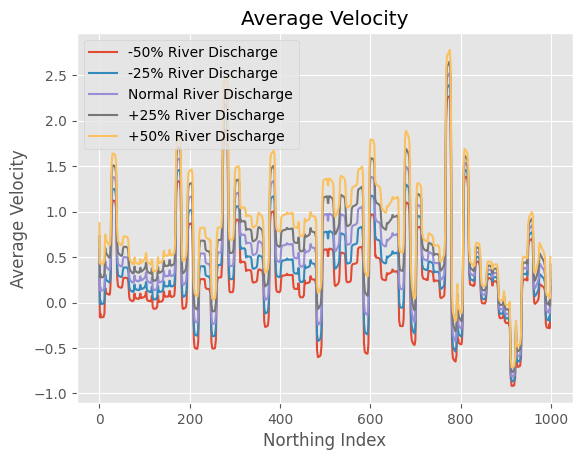

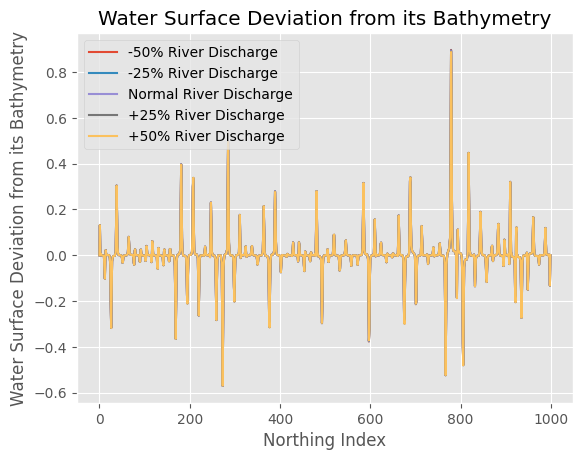

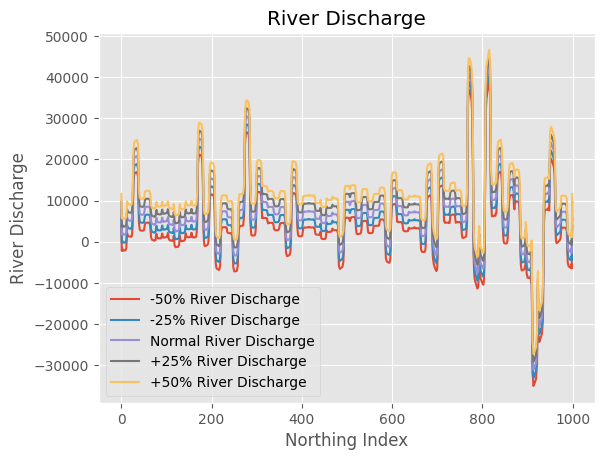

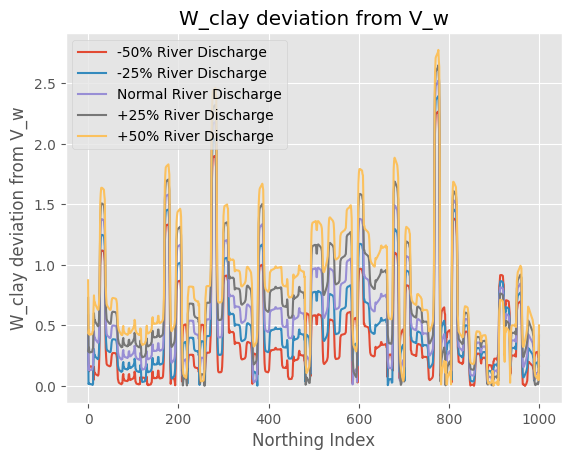

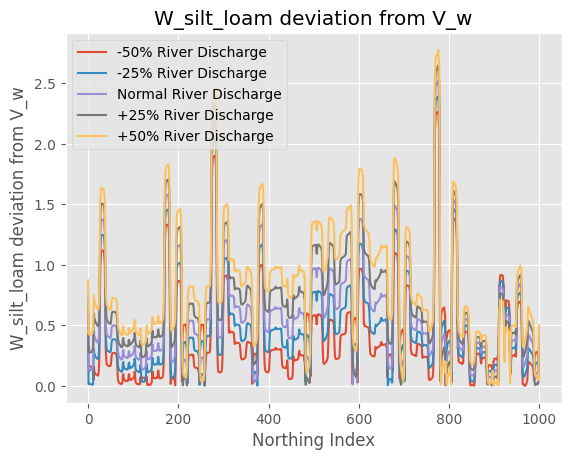

In [ ]:

ylabels = ["Average Velocity","Water Surface Deviation from its Bathymetry",
           "River Discharge", "W_clay deviation from V_w",
           "W_silt_loam deviation from V_w"]

xlabels = "Northing Index"

plt.style.use('ggplot')


s = ["-50% River Discharge","-25% River Discharge","Normal River Discharge","+25% River Discharge","+50% River Discharge",]
for i in range(5):
  for j in range(len(sim_river_discharge)):
    plt.plot(sim_river_discharge[j,i,:], label = '{}'.format(s[j]))

    plt.legend()

  plt.xlabel(xlabels)

  plt.ylabel(ylabels[i])

  plt.title(ylabels[i])

  plt.savefig(out+"_".join(ylabels[i].split(" "))+".png")

  plt.show()



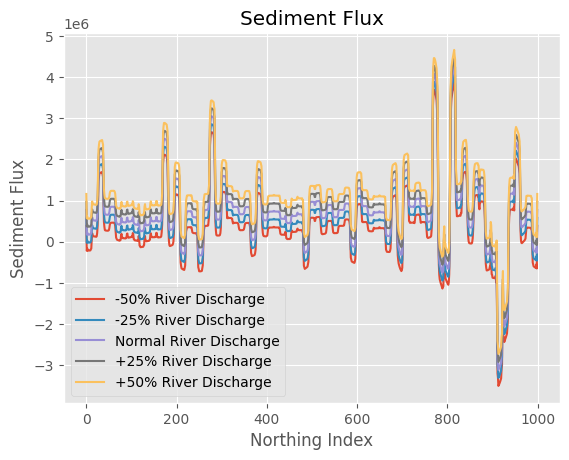

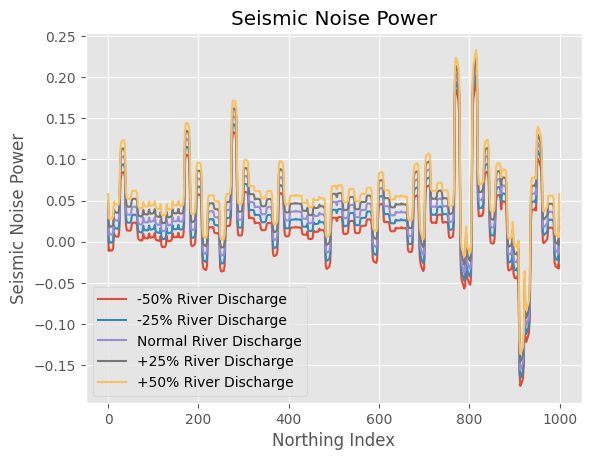

In [ ]:
ylabels = ["Sediment Flux", 'Seismic Noise Power']

xlabels = "Northing Index"

plt.style.use('ggplot')

vars = [sed_flux(sim_river_discharge[i,2,:]),snp(sim_river_discharge[i,2,:])]

s = ["-50% River Discharge","-25% River Discharge","Normal River Discharge","+25% River Discharge","+50% River Discharge",]

for i in range(5):

  plt.plot(sed_flux(sim_river_discharge[i,2,:]), label = '{}'.format(s[i]))

  plt.xlabel(xlabels)

  plt.ylabel(ylabels[0])

  plt.title(ylabels[0])
  plt.legend()


plt.savefig(out+"differential_discharge_"+"_".join(ylabels[0].split(" "))+".png")

plt.show()


for i in range(5):

  plt.plot(snp(sim_river_discharge[i,2,:]), label = '{}'.format(s[i]))

  plt.xlabel(xlabels)

  plt.ylabel(ylabels[1])

  plt.title(ylabels[1])
  plt.legend()


plt.savefig(out+"differential_discharge_"+"_".join(ylabels[1].split(" "))+".png")

plt.show()





In [ ]:
northcrs_f[1000]

In [ ]:
!pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=b55f29989dd0ecf75fe336d87a537849caf459271aa924655d450aa94088d455
  Stored in directory: /root/.cache/pip/wheels/2f/a1/c8/543df0e8f5e824c3e92a432e32deb9cd89ae686095ee8cfcbe
Successfully built utm


In [ ]:
import utm

n,e = utm.to_latlon(eastcrs_f[793,257],northcrs_f[793],46,"N")

n,e

(22.262005446570859366, 91.83742883726010053)

In [ ]:
def to_dms(val):

  c1 = str(val)

  c2 = c1.split(".")

  c3 = c2[0]

  c4 = "."+c2[1]

  c5 = str(float(c4)*60).split(".")

  c6 = c5[0]

  c7 = str(float("."+c5[1])* 60)


  c8 = " ".join([c3,c6,c7])

  return c8


to_dms(n), to_dms(e)

('22 15 43.21960765509384', '91 50 14.7438141363618')

In [ ]:
1000*(286/3018)

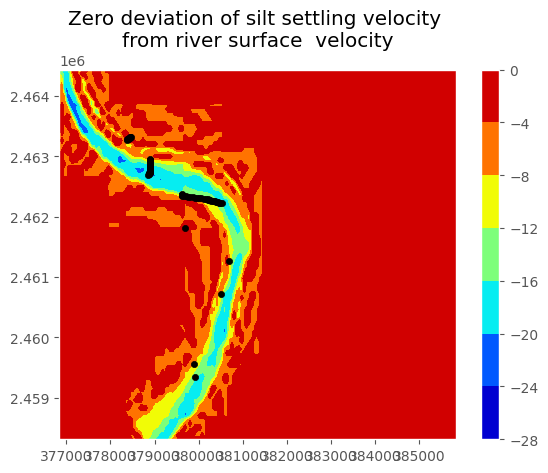

In [ ]:
indices = np.hstack([205,250,480,590,700,np.arange(780,811,1),np.arange(875,926,1), np.arange(990,1001,1)])

ne = [np.array(utm.to_latlon(eastcrs_f[i,257],northcrs_f[i],46,"N")) for i in indices]

lat_lon_silt = [[to_dms(i[0]),to_dms(i[1])] for i in ne]

ne_ = [np.array([eastcrs_f[i,257],northcrs_f[i]]) for i in indices]

ne_e = [i[0] for i in ne_]

ne_n = [i[1] for i in ne_]


m = plt.contourf(df.easting.values, df.northing.values[:95],df.bathymetry.values[:95,:], cmap = "jet")

plt.scatter(ne_e, ne_n, c = "k", s = 20)

plt.title("Zero deviation of silt settling velocity \nfrom river surface  velocity")

plt.colorbar(m)

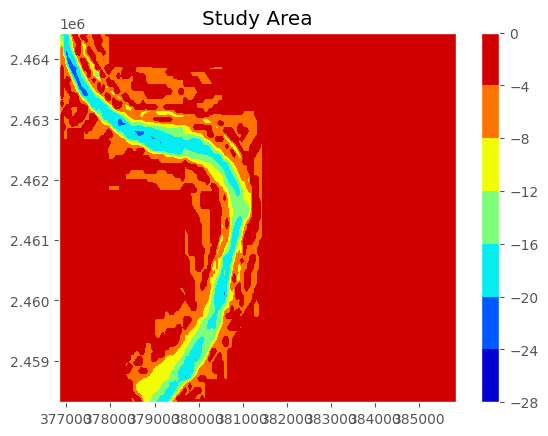

In [ ]:
m = plt.contourf(df.easting.values, df.northing.values[:95],df.bathymetry.values[:95,:], cmap = "jet")
plt.title("Study Area")

plt.colorbar(m)

In [ ]:
dic = {"1000": ('22 16 16.546868888930703', '91 49 13.233074370540601'),
    "0":('22 13 33.62971062877668', '91 49 44.5845823509498')}